<h2>Ejercicio computer vision</h2>

<h3>Librerías</h3>

In [186]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install opencv-python
!python -m pip install m2bk
!python -m pip install seaborn

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from m2bk import *
import glob

In [4]:
images = [cv2.imread(file, -1) for file in glob.glob("camera_top/*.tif")]

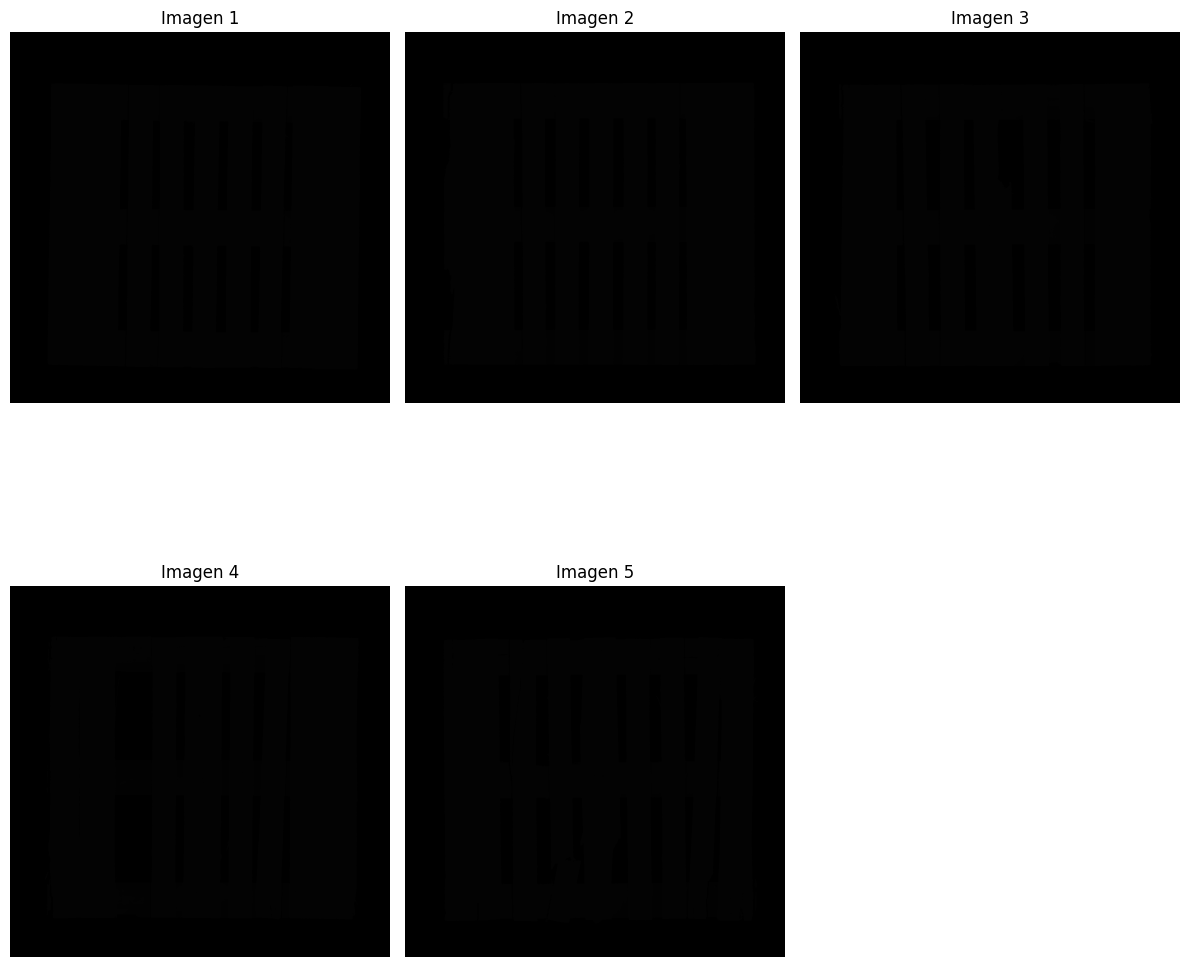

In [5]:
cols = 3
rows = (len(images) + cols - 1) // cols

plt.figure(figsize=(12, 12))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=2**16)
    plt.axis('off')
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

In [6]:
[print(img.shape) for img in images]

(2000, 2048)
(2000, 2048)
(2000, 2048)
(2000, 2048)
(2000, 2048)


[None, None, None, None, None]

<h3> 1. Generar una imagen normalizada de la imagen TIFF (cv2.normalize()), esto producirá 
una imagen con mayor contraste que la original. </h3>

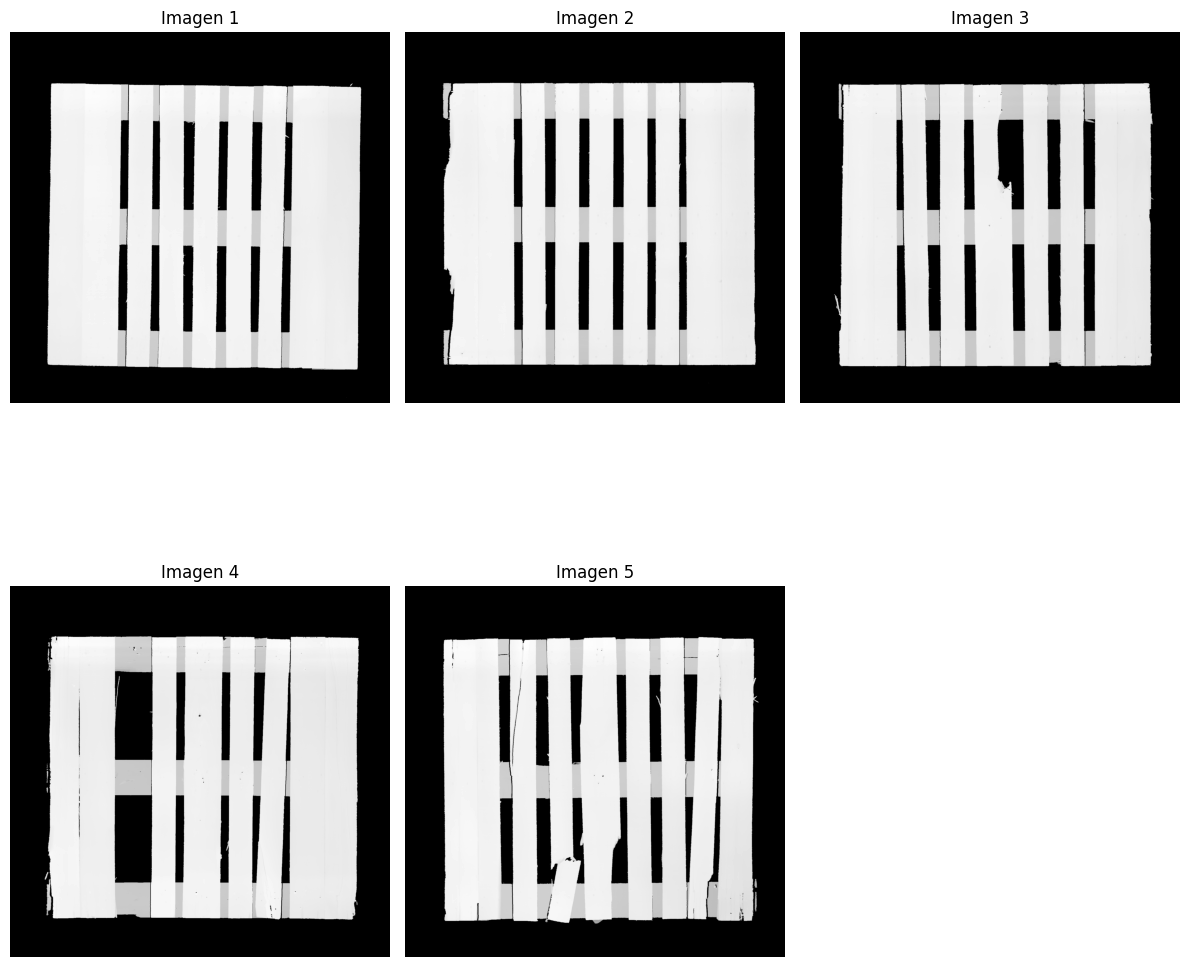

In [7]:
normalizedImages = [cv2.normalize(img, None, alpha=0, beta=2**16, norm_type=cv2.NORM_MINMAX) for img in images]

cols = 3
rows = (len(normalizedImages) + cols - 1) // cols

plt.figure(figsize=(12, 12))

for i, img in enumerate(normalizedImages):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=2**16)
    plt.axis('off')
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h3> 2. Generar dos imágenes binarias a partir de la imagen normalizada, donde en una nos 
quedemos con los tableros verticales y en la otra con los horizontales. </h3>

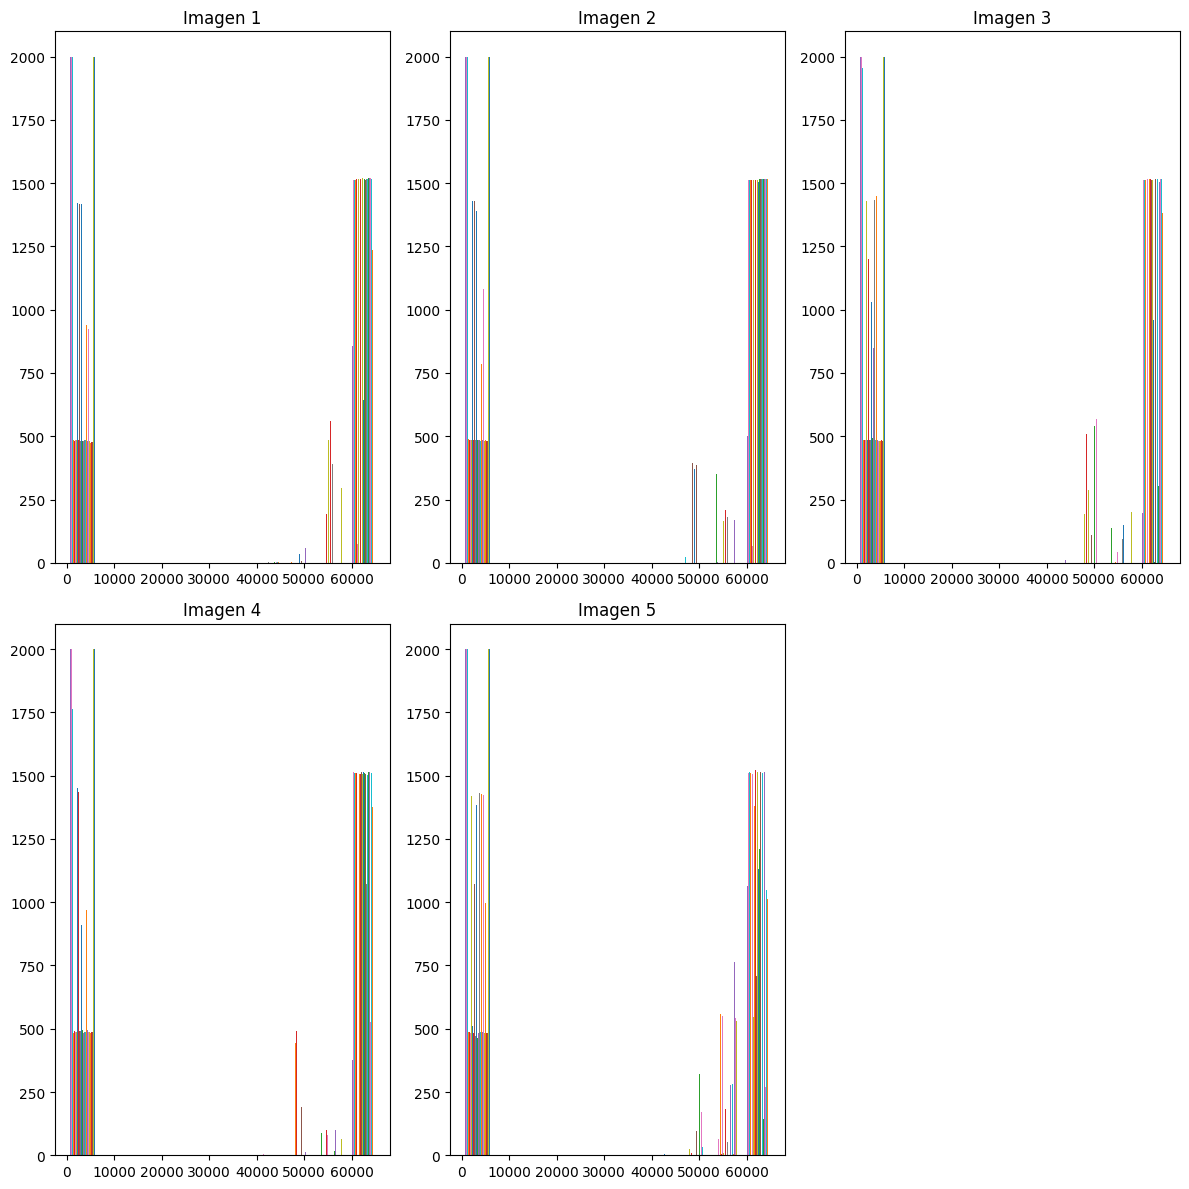

In [8]:
def binarize(image, threshold):
    #Empieza el codigo aqui
    width = image.shape[0]
    height = image.shape[1]
    binary_image = np.zeros((width,height))
    binary_image_2 = np.zeros((width,height))

    for x in range(width):    
        for y in range(height):
                if image[x,y] < threshold:
                    binary_image[x,y] = image[x,y]
                elif image[x,y] > threshold:
                    binary_image_2[x,y] = image[x,y]

    #Termina el codigo aqui
    return binary_image, binary_image_2


plt.figure(figsize=(12, 12))

for i, img in enumerate(normalizedImages):
    plt.subplot(rows, cols, i + 1)
    plt.hist(img)
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()


In [49]:
bot_binary_images = [binarize(normalizedImage, 55000)[0] for normalizedImage in normalizedImages]
top_binary_images = [binarize(normalizedImage, 55000)[1] for normalizedImage in normalizedImages]

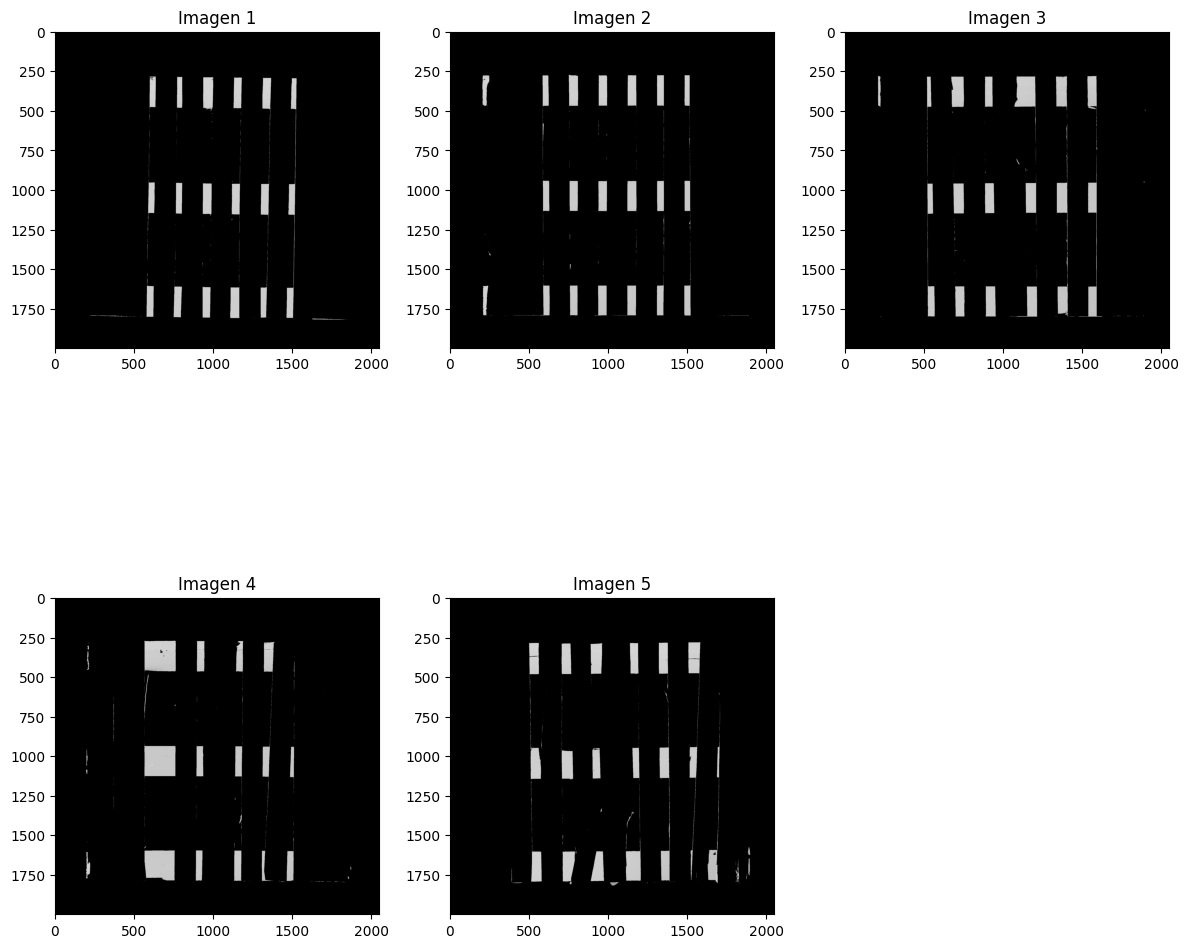

In [50]:
plt.figure(figsize=(12, 12))

for i, bot_binary_image in enumerate(bot_binary_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(bot_binary_image,cmap='gray', vmin=0, vmax=2**16)
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

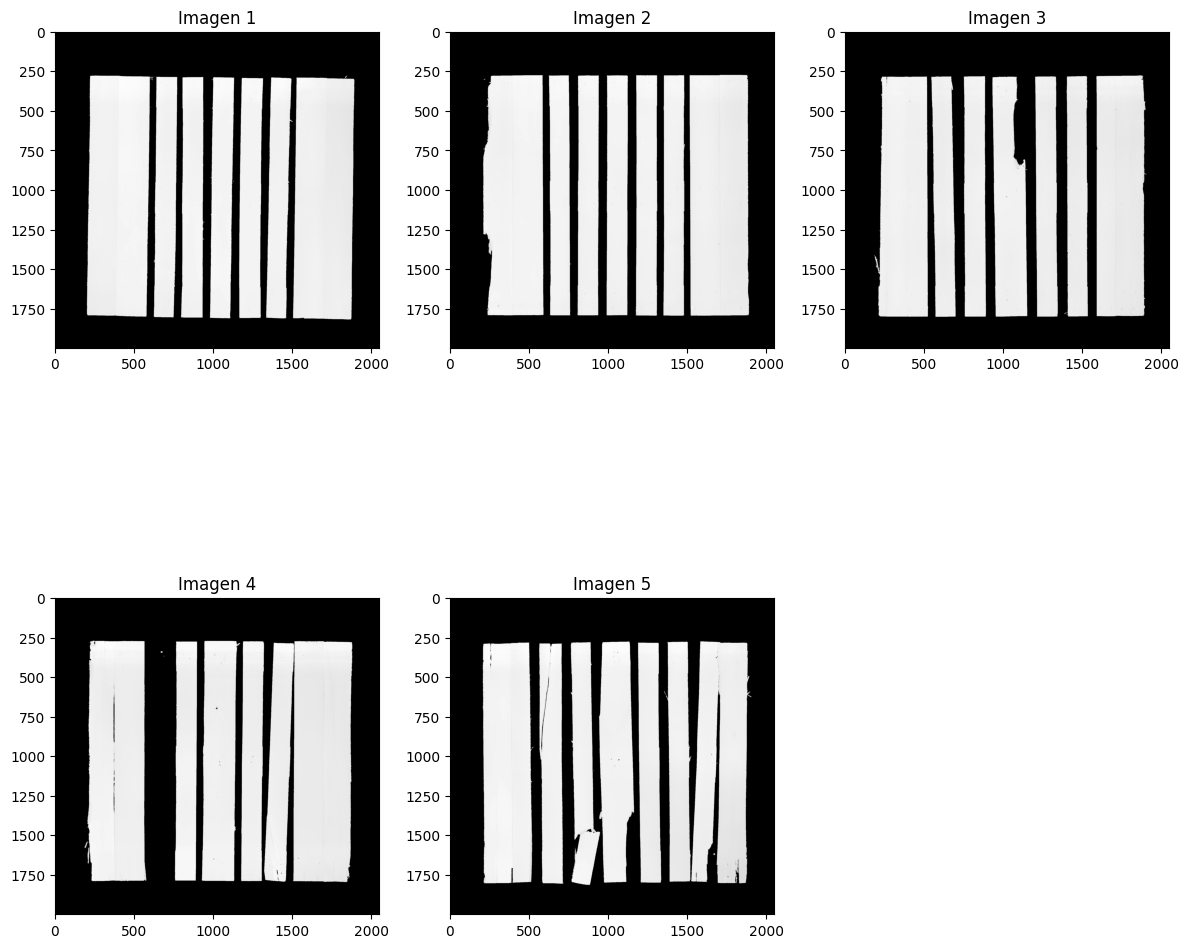

In [11]:
plt.figure(figsize=(12, 12))

for i, top_binary_image in enumerate(top_binary_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(top_binary_image,cmap='gray', vmin=0, vmax=2**16) 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h3>3. Hallar los contornos de los tableros en ambas imágenes.</h3>

Primero limpiamos las imágenes

Imagenes de la parte inferior del pallet

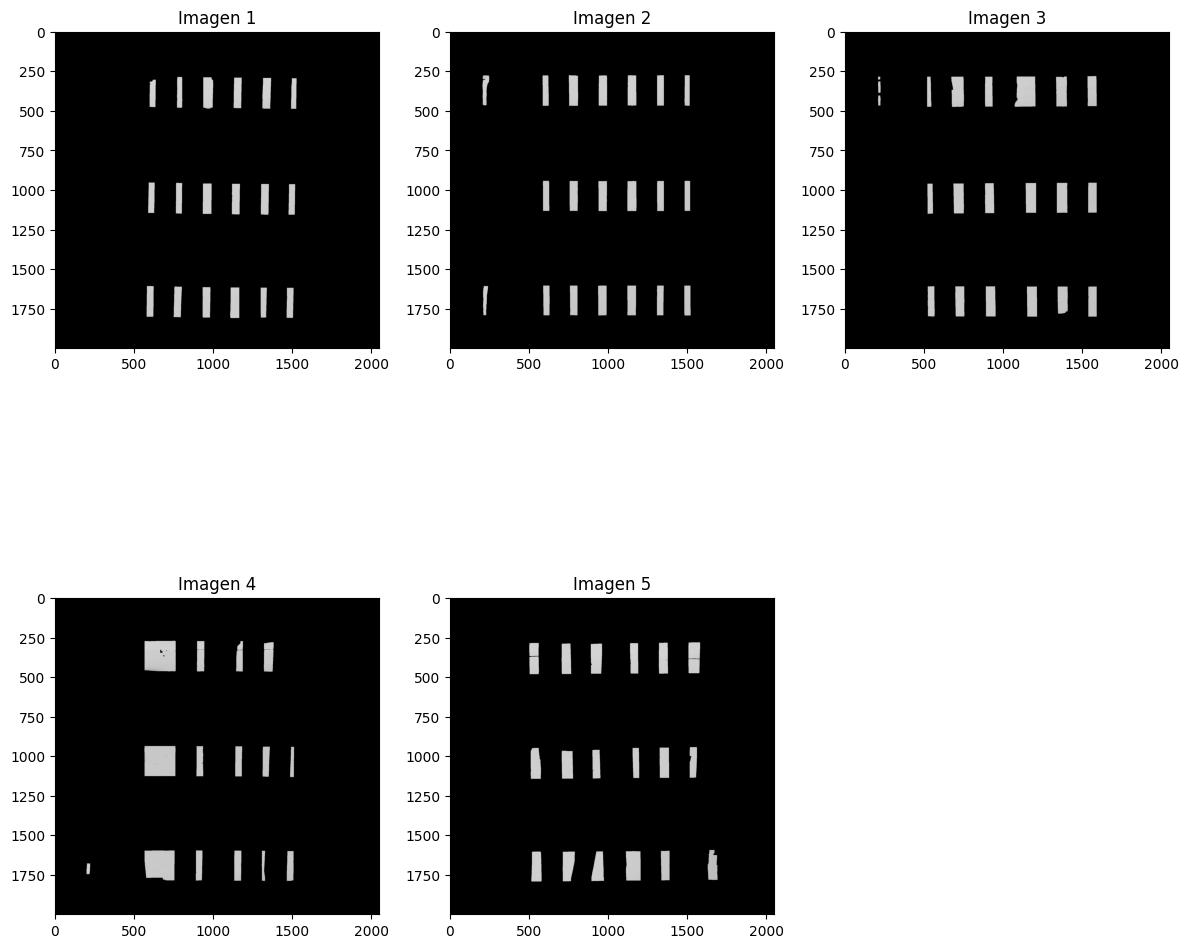

In [ ]:
kernel = np.ones((5,5), dtype=np.uint8)

#Le daremos un tratamiento especial a la imagen nº 4 que tiene excesivo ruido
bot_binary_images_clear = [
    cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=5 if i == 4 else 3)
    for i, img in enumerate(bot_binary_images)
]

plt.figure(figsize=(12, 12))

for i, img in enumerate(bot_binary_images_clear):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img,cmap='gray', vmin=0, vmax=2**16) 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

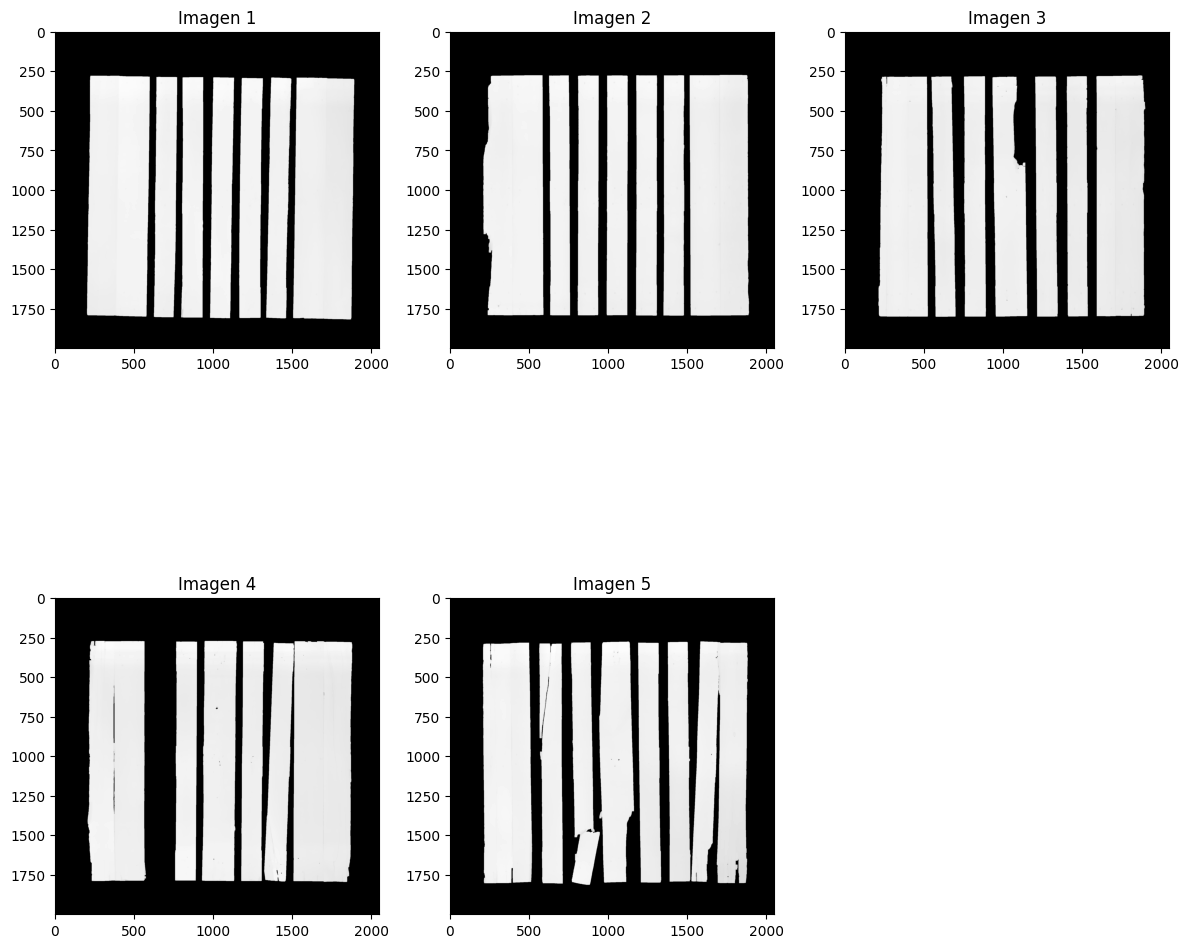

In [13]:
top_binary_images_clear = [cv2.morphologyEx(img, cv2.MORPH_OPEN , kernel,iterations=3) for img in top_binary_images]

plt.figure(figsize=(12, 12))

for i, img in enumerate(top_binary_images_clear):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img,cmap='gray', vmin=0, vmax=2**16) 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

Encontramos los contornos de las imágenes que representan la parte inferior del pallet

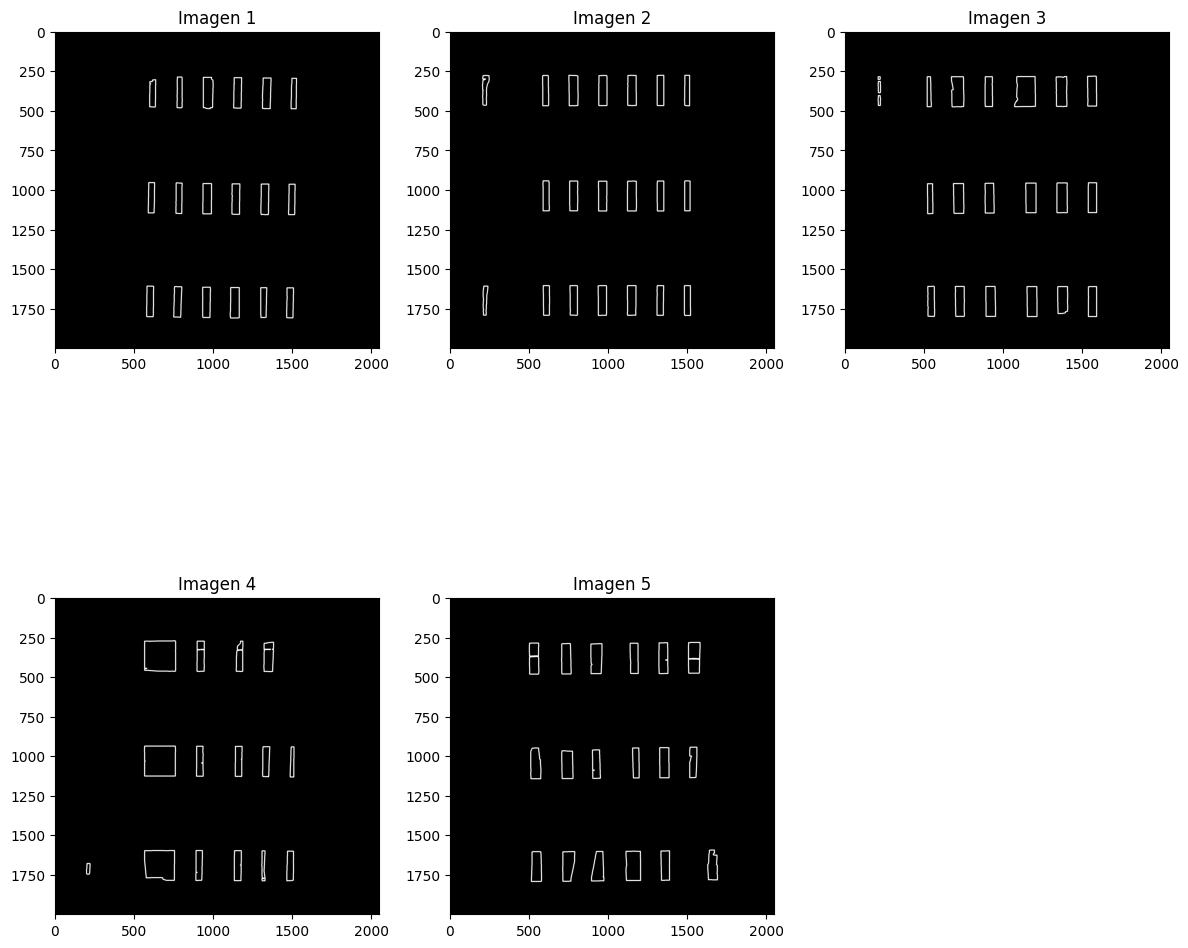

In [58]:
contours_bot = [cv2.findContours(img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0] for img in bot_binary_images_clear]
hierarchy_bot = [cv2.findContours(img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1] for img in bot_binary_images_clear]
black_image_bot = [np.ones((img.shape[0], img.shape[1],1)) for img in bot_binary_images_clear]

img_contours_bot = []

for i in range(len(bot_binary_images_clear)):
    contoured = cv2.drawContours(black_image_bot[i], contours_bot[i], -1, 3, 5)
    img_contours_bot.append(contoured)

plt.figure(figsize=(12, 12))

for i, img in enumerate(img_contours_bot):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

Encontramos los contornos de las imágenes que representan la parte superior del pallet

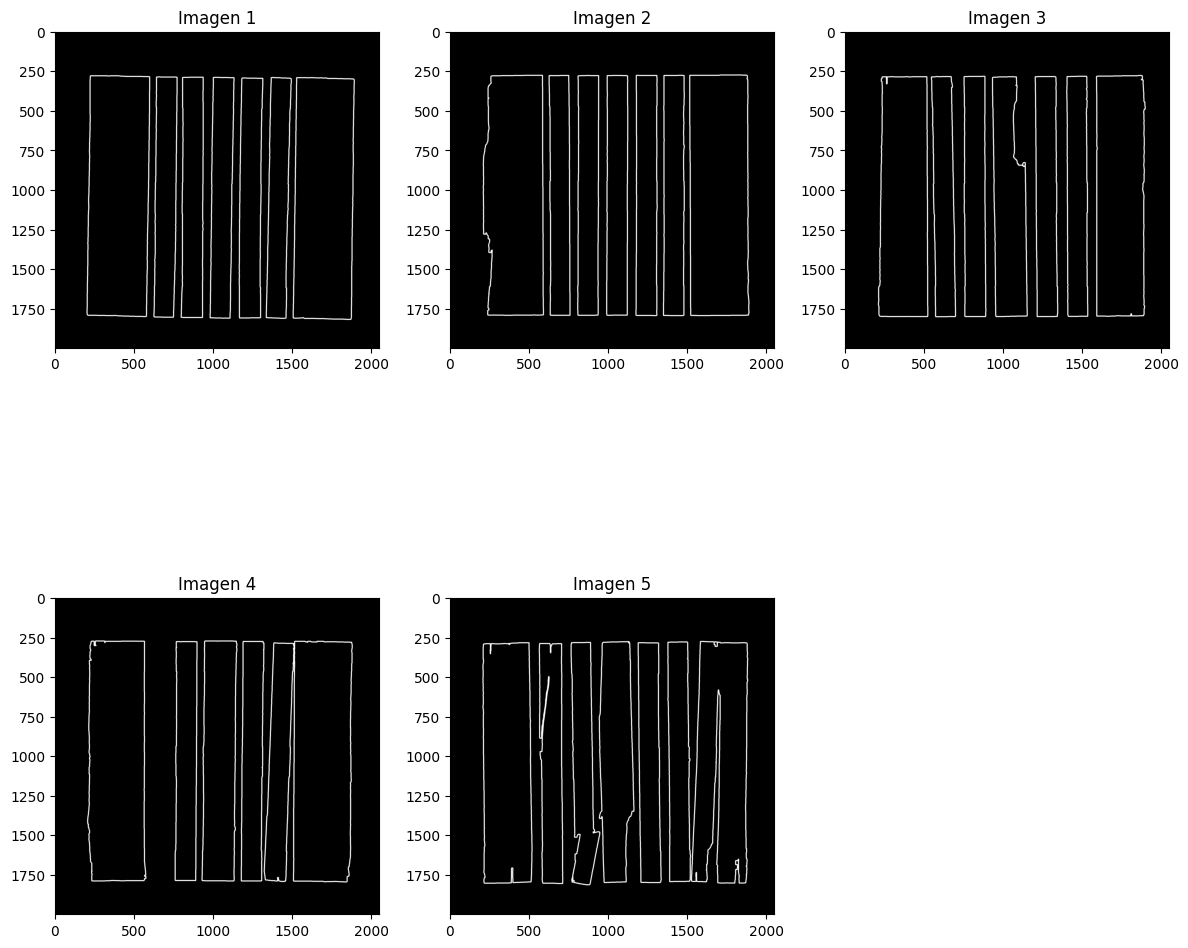

In [15]:
contours_top = [cv2.findContours(img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0] for img in top_binary_images_clear]
hierarchy_top = [cv2.findContours(img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[1] for img in top_binary_images_clear]
black_image_top = [np.ones((img.shape[0], img.shape[1],1)) for img in top_binary_images_clear]

img_contours_top = []

for i in range(len(top_binary_images_clear)):
    contoured = cv2.drawContours(black_image_top[i], contours_top[i], -1, 3, 5)
    img_contours_top.append(contoured)

plt.figure(figsize=(12, 12))

for i, img in enumerate(img_contours_top):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h3> 4. Contar el número de tableros. </h3>

<h4> Tablones verticales </h4>

<h8> Calculo del threshold para la detección de tablones dobles </h8>

In [59]:
def getThresholdForduplicatedBoards(countours):
    #VERTICALES
    boards_width = []

    for cnt in countours:
        x, y, w, h = cv2.boundingRect(cnt)
        boards_width.append(w)

    media = np.mean(boards_width)
    b_std = np.std(boards_width)

    #El umbral de momento es la media + 0.5 * la desviación tipica 
    threshold = media + (0.5 * b_std)
    print(f'El umbral para la detección de tablones verticales es {threshold}')
    return threshold

thresholds = [getThresholdForduplicatedBoards(countours) for countours in contours_top]

El umbral para la detección de tablones verticales es 273.688982259491
El umbral para la detección de tablones verticales es 258.54272049030226
El umbral para la detección de tablones verticales es 238.68501593976228
El umbral para la detección de tablones verticales es 287.4931266607272
El umbral para la detección de tablones verticales es 255.23511893635958


<h8> Número de tablones verticales </h8>

El número de tablones verticales es: 9
El número de tablones verticales es: 9
El número de tablones verticales es: 9
El número de tablones verticales es: 8
El número de tablones verticales es: 9


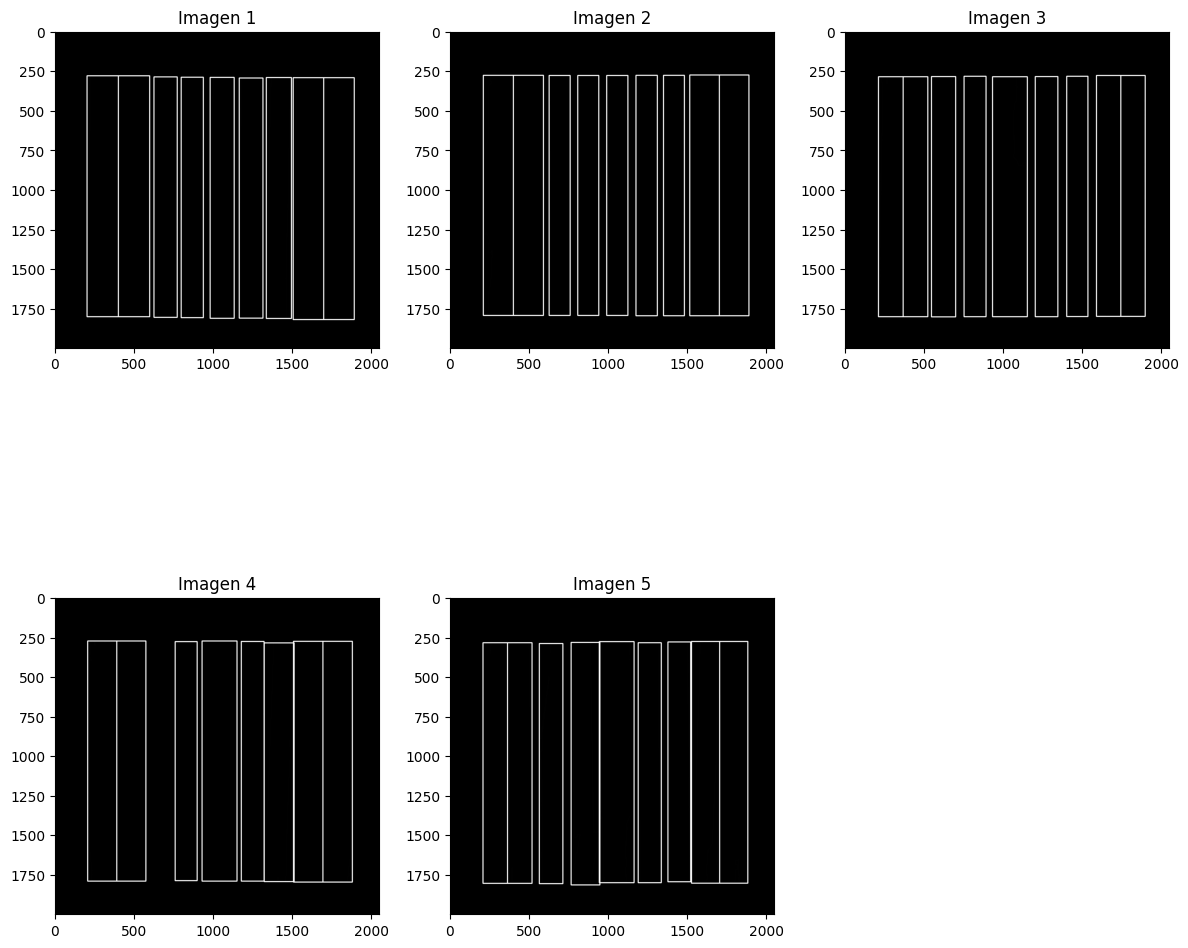

In [60]:
n_vboard_images = []

def countBoards(n_vboard_images, img_contour, contours, threshold):
    n_board_image_v = img_contour.copy()
    boards_v = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        if w > threshold:  # Si es más del threshold
            boards_v.append([x, y, w // 2, h])  # Dividir en dos
            boards_v.append([x + w // 2, y, w // 2, h])
        else:
            boards_v.append([x, y, w, h])

    n_vboards = len(boards_v)

    for board in boards_v:
        x, y, w, h = board
        cv2.rectangle(n_board_image_v, (x, y), (x + w, y + h), (255, 0, 0), 5)

    n_vboard_images.append(n_board_image_v)
    print(f'El número de tablones verticales es: {n_vboards}')


for i in range(len(img_contours_top)):
    countBoards(n_vboard_images, img_contours_top[i], contours_top[i], thresholds[i])


plt.figure(figsize=(12, 12))

for i, img in enumerate(n_vboard_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h4> Tablones horizontales </h4>

El número de tablones horizontales es: 3
El número de tablones horizontales es: 3
El número de tablones horizontales es: 3
El número de tablones horizontales es: 3
El número de tablones horizontales es: 3


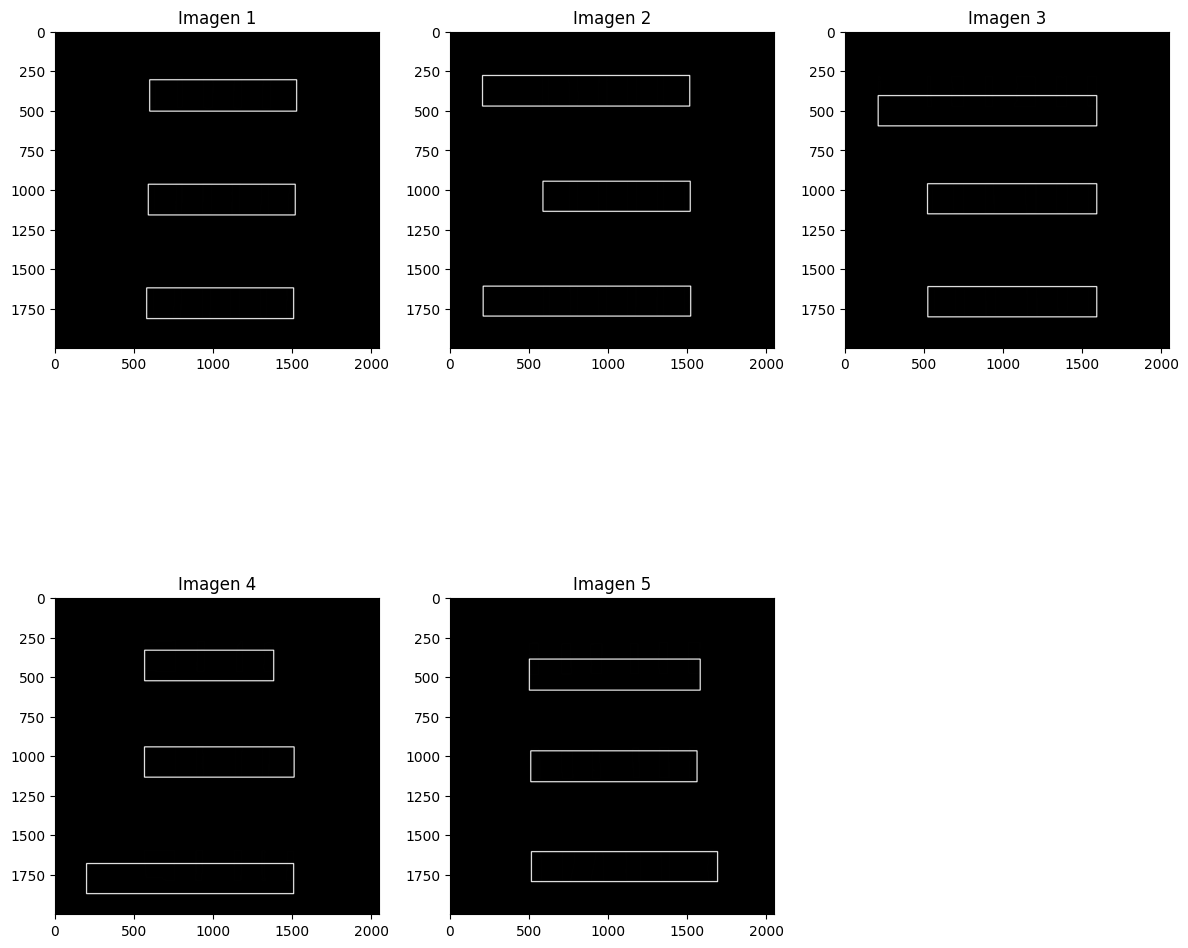

In [61]:

def getHorizontalBoards(img_contours, contours, count=True):
    ## HORIZONTALES
    n_board_image_h = img_contours.copy()

    boards_h = []

    threshold_h = 150

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        merged_board = False
        for board in boards_h:
            bx, by, bw, bh = board
            if abs(by - y) <= threshold_h:     
                xToLeft = min(bx, x)  # Chequeamos si la ampliación del rectángulo es más a la izq
                xToRight = max(bx + bw, x + w)  # Same pero para la derecha
                board[0] = xToLeft  # Actualizamos la posición del tablón (en caso de que sea la misma no pasa nada)
                board[2] = xToRight - xToLeft  # Actualizamos el ancho total del tablon
                board[3] = max(bh, h)  # Ajustar la altura
                merged_board = True
                break
        if not merged_board:
            boards_h.append([x, y, w, h])       

    for board in boards_h:
        x, y, w, h = board
        cv2.rectangle(n_board_image_h, (x, y), (x + w, y + h), (255, 0, 0), 5)

    n_hboards = len(boards_h)
    
    if(count):   
        print(f'El número de tablones horizontales es: {n_hboards}')

    return n_board_image_h, boards_h


n_board_images_h = [getHorizontalBoards(img_contours_bot[i], contours_bot[i])[0] for i in range(len(contours_bot))]

plt.figure(figsize=(12, 12))

for i, img in enumerate(n_board_images_h):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h3> 5. Poner un numero a los tableros siguiendo la nomenclatura de la imagen 
anterior. </h3>

<h4> Tablones verticales </h4>

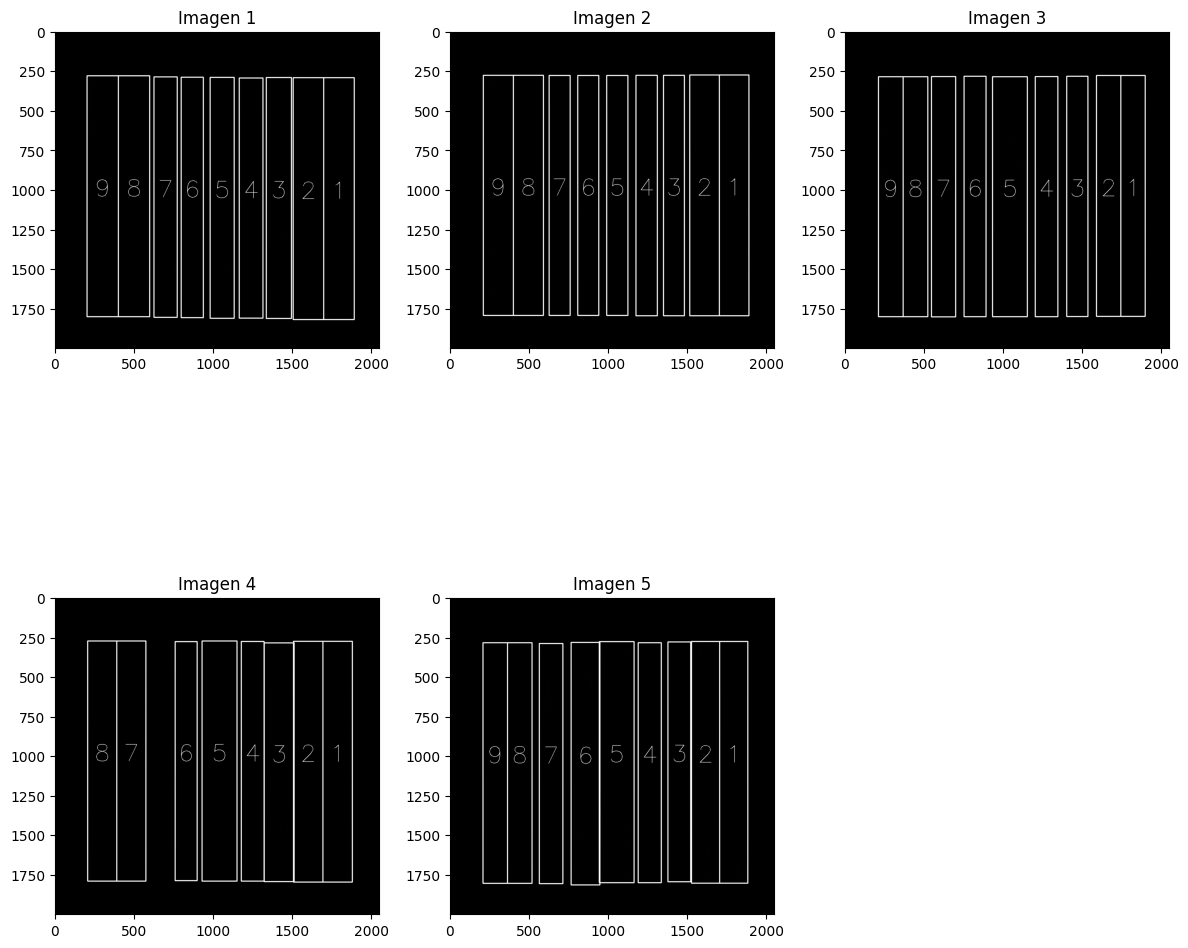

In [62]:
def getVerticalBoards(contours, threshold):
    boards_v = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        if w > threshold:  # Si es más del threshold
            boards_v.append([x, y, w // 2, h])  # Dividir en dos
            boards_v.append([x + w // 2, y, w // 2, h])
        else:
            boards_v.append([x, y, w, h])
    
    return boards_v

boards_v = [getVerticalBoards(contours_top[i], thresholds[i]) for i in range(len(contours_top))]
number_bv = [img.copy() for img in n_vboard_images]

for i in range(len(boards_v)):
    #Ordenamos en función de la X del mayor al menor
    sorted_boards_v = sorted(boards_v[i], key=lambda x: x[0], reverse=True)

    for j in range(len(sorted_boards_v)):
        x, y, w, h = sorted_boards_v[j]
        cv2.rectangle(number_bv[i], (x, y), (x + w, y + h), (255, 0, 0), 5)

        # Calcula el centro del rectángulo
        center_x = x + w // 2
        center_y = y + h // 2

        # Poner el número en el centro del rectángulo
        cv2.putText(number_bv[i], str(j+1), (center_x-50, center_y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 0), 2)

plt.figure(figsize=(12, 12))

for i, img in enumerate(number_bv):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()

<h4> Tablones horizontales </h4>

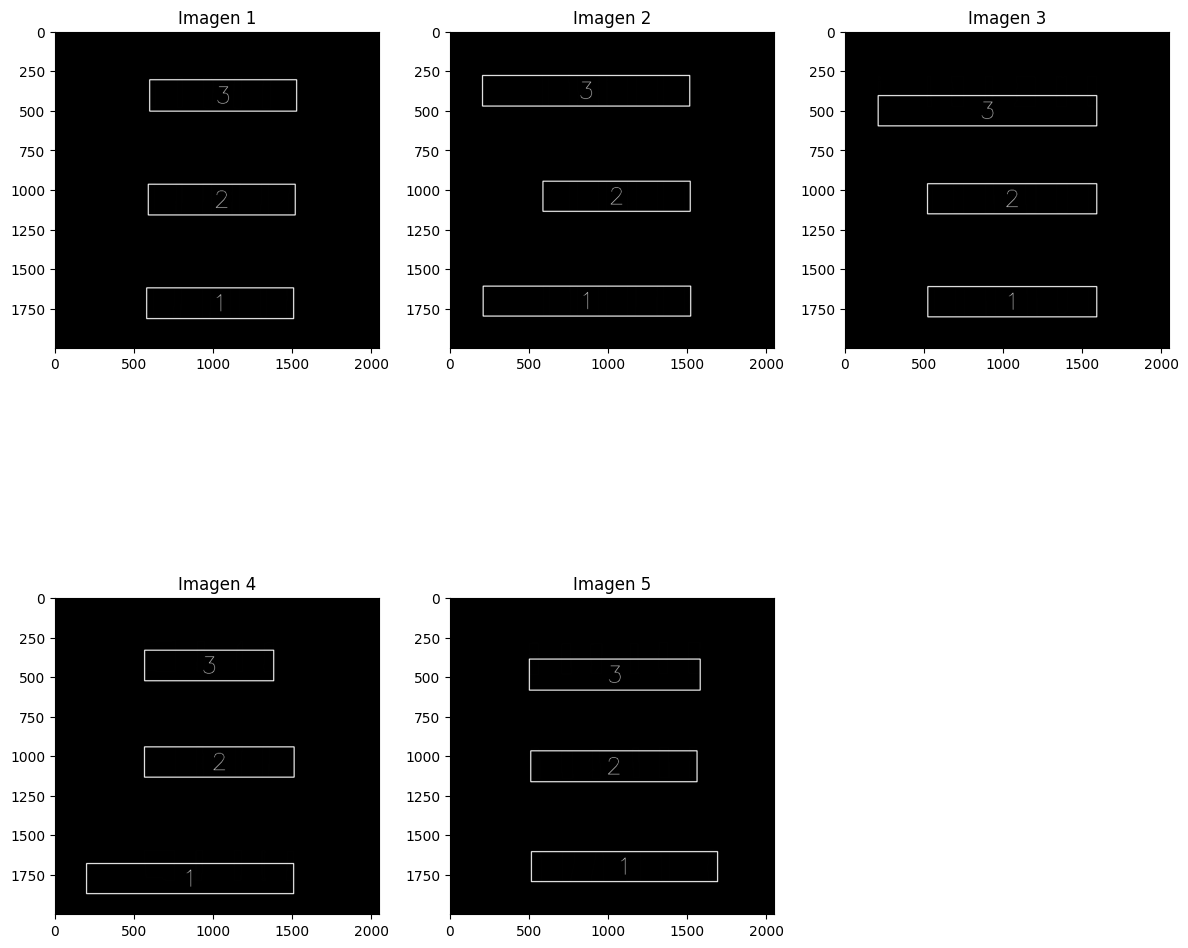

In [63]:
boards_h = [getHorizontalBoards(img_contours_bot[i], contours_bot[i], False)[1] for i in range(len(contours_bot))]
number_bh = [img.copy() for img in n_board_images_h]

for i in range(len(boards_h)):
    #Ordenamos en función de la Y del mayor al menor
    sorted_boards_h = sorted(boards_h[i], key=lambda x: x[1], reverse=True)

    for j in range(len(sorted_boards_h)):
        x, y, w, h = sorted_boards_h[j]
        cv2.rectangle(number_bh[i], (x, y), (x + w, y + h), (255, 0, 0), 5)

        center_x = x + w // 2
        center_y = y + h // 2

        # Poner el número en el centro del rectángulo
        cv2.putText(number_bh[i], str(j+1), (center_x-50, center_y+50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 0), 2)
 
plt.figure(figsize=(12, 12))

for i, img in enumerate(number_bh):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray') 
    plt.title(f'Imagen {i+1}')

plt.tight_layout()
plt.show()